In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xgi
import matplotlib.pyplot as plt
from src import *
import networkx as nx

In [3]:
H = xgi.Hypergraph([[0, 1, 2], [2, 3], [0, 3, 4, 5]])
# H = xgi.load_xgi_data("hospital-lyon", max_order=2)
# H.cleanup()
# mixed_ids = [
#     id
#     for id in H.edges
#     if {"PAT", "MED"} == set(H.nodes(list(H.edges.members(id))).attrs("type").aslist())
# ]
# len(mixed_ids)
# H = xgi.subhypergraph(H, edges=mixed_ids).copy()
# H.cleanup()
n = H.num_nodes
m = H.num_edges

I = full_incidence_matrix(H, n, m)

In [4]:
rho = 0.05
save_data = False

In [5]:
g_x = 0.1 * np.ones(n)
g_y = 0.05 * np.ones(m)
b_x = 0.3 * np.ones(n)
b_y = 0.4 * np.ones(m)
epsilon = np.linspace(0, 1, 11)
samples_eps, ps_eps = vary_epsilon(
    I,
    g_x,
    g_y,
    b_x,
    b_y,
    rho,
    epsilon,
    num_realizations=100,
    tmin=0,
    tmax=20,
    dt=1,
    nsamples=10,
    burn_in=100,
    skip=100,
)

Acceptance ratio is 0.117
Acceptance ratio is 0.029
Acceptance ratio is 0.037
Acceptance ratio is 0.04


/Users/nicholaslandry/Documents/GitHub/hospital-c-diff-spread/src/inference.py:81: RuntimeWarning: invalid value encountered in double_scalars
  compute_delta(new_n_l, l_node[i])


Acceptance ratio is 0.05
Acceptance ratio is 0.039
Acceptance ratio is 0.051
Acceptance ratio is 0.04
Acceptance ratio is 0.048
Acceptance ratio is 0.027
Acceptance ratio is 0.058
Acceptance ratio is 0.042
Acceptance ratio is 0.032
Acceptance ratio is 0.049
Acceptance ratio is 0.038
Acceptance ratio is 0.033
Acceptance ratio is 0.05
Acceptance ratio is 0.03
Acceptance ratio is 0.046
Acceptance ratio is 0.056
Acceptance ratio is 0.04
Acceptance ratio is 0.041
Acceptance ratio is 0.04
Acceptance ratio is 0.038
Acceptance ratio is 0.044
Acceptance ratio is 0.046
Acceptance ratio is 0.058
Acceptance ratio is 0.052
Acceptance ratio is 0.031
Acceptance ratio is 0.048
Acceptance ratio is 0.044
Acceptance ratio is 0.119
Acceptance ratio is 0.036
Acceptance ratio is 0.058
Acceptance ratio is 0.044
Acceptance ratio is 0.029
Acceptance ratio is 0.032
Acceptance ratio is 0.028
Acceptance ratio is 0.032
Acceptance ratio is 0.046
Acceptance ratio is 0.05
Acceptance ratio is 0.111
Acceptance ratio is

In [6]:
if save_data:
    np.savetxt("Data/ps_eps.txt", np.array(ps_eps))

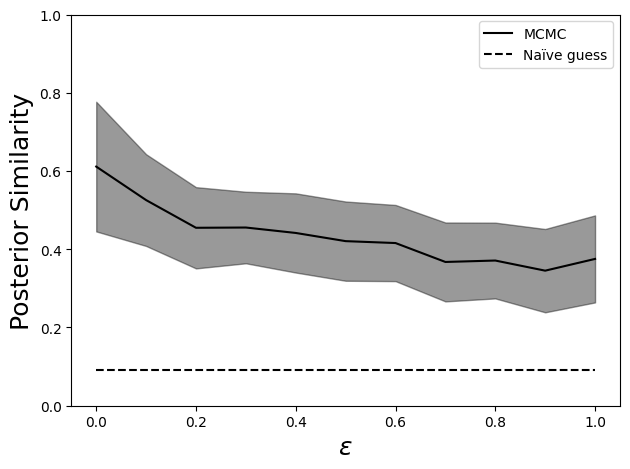

In [7]:
pem = np.array([np.mean(p) for p in ps_eps])
ped = np.array([np.std(p) for p in ps_eps])
epsilon = np.linspace(0, 1, 11)
null_ps = posterior_similarity(I, rho*np.ones_like(I))
plt.plot(epsilon, pem, "k-", label="MCMC")
plt.fill_between(epsilon, pem-ped, pem+ped, color="black", alpha=0.4)

plt.plot([min(epsilon), max(epsilon)], [null_ps, null_ps], "k--", label=r'Naïve guess')
plt.xlabel(r"$\epsilon$", fontsize=18)
plt.ylabel("Posterior Similarity", fontsize=18)
plt.ylim([0, 1])
plt.legend()
plt.tight_layout()
plt.savefig("Figures/ps_vs_epsilon.pdf", dpi=1000)
plt.savefig("Figures/ps_vs_epsilon.png", dpi=1000)
plt.show()

In [8]:
epsilon = 0.0
tau = 0.25
f = lambda e, x: (e.dot(x)/max(np.sum(e), 1) >= tau)*(1 - epsilon) + epsilon
g = lambda n, x: (n.dot(x)/max(np.sum(n), 1) >= tau)

g_x = 0.1 * np.ones(n)
g_y = 0.05 * np.ones(m)
b_x = 0.3 * np.ones(n)
b_y = 0.4 * np.ones(m)
rho = 0.05
tmax = [10, 30, 50, 100, 120, 150, 200, 250, 300]
samples_tmax, ps_tmax = vary_tmax(
    I,
    g_x,
    g_y,
    b_x,
    b_y,
    f,
    g,
    rho,
    num_realizations=10,
    tmin=0,
    tmax=tmax,
    dt=1,
    nsamples=10,
    burn_in=100,
    skip=100,
)


Acceptance ratio is 0.042
Acceptance ratio is 0.062


/Users/nicholaslandry/Documents/GitHub/hospital-c-diff-spread/src/inference.py:81: RuntimeWarning: invalid value encountered in double_scalars
  compute_delta(new_n_l, l_node[i])


Acceptance ratio is 0.068
Acceptance ratio is 0.035
Acceptance ratio is 0.03
Acceptance ratio is 0.046
Acceptance ratio is 0.044
Acceptance ratio is 0.059
Acceptance ratio is 0.041
Acceptance ratio is 0.062

Acceptance ratio is 0.04
Acceptance ratio is 0.029
Acceptance ratio is 0.026
Acceptance ratio is 0.038
Acceptance ratio is 0.034
Acceptance ratio is 0.097
Acceptance ratio is 0.032
Acceptance ratio is 0.113
Acceptance ratio is 0.024
Acceptance ratio is 0.026

Acceptance ratio is 0.054
Acceptance ratio is 0.032
Acceptance ratio is 0.088
Acceptance ratio is 0.041
Acceptance ratio is 0.044
Acceptance ratio is 0.054
Acceptance ratio is 0.038
Acceptance ratio is 0.024
Acceptance ratio is 0.04
Acceptance ratio is 0.04

Acceptance ratio is 0.044
Acceptance ratio is 0.023
Acceptance ratio is 0.016
Acceptance ratio is 0.037
Acceptance ratio is 0.015
Acceptance ratio is 0.098
Acceptance ratio is 0.037
Acceptance ratio is 0.043
Acceptance ratio is 0.015
Acceptance ratio is 0.028

Acceptance r

In [9]:
if save_data:
    np.savetxt("Data/ps_tmax.txt", np.array(ps_tmax))

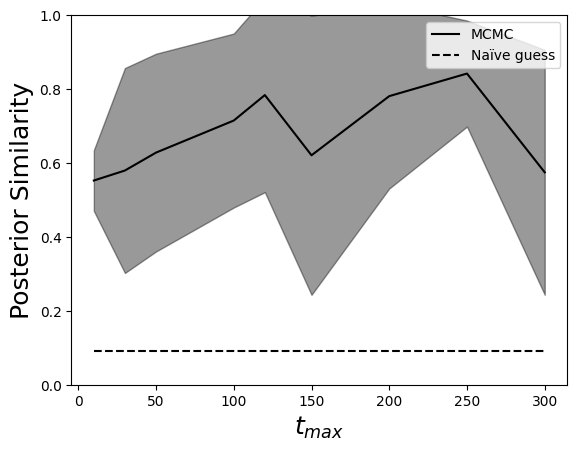

In [16]:
ptm = np.array([np.mean(p) for p in ps_tmax])
ptd = np.array([np.std(p) for p in ps_tmax])
tmax = [10, 30, 50, 100, 120, 150, 200, 250, 300]
plt.plot(tmax, ptm, color="black", label="MCMC")
plt.fill_between(tmax, ptm-ptd, ptm+ptd, color="black", alpha=0.4)

null_ps = posterior_similarity(I, rho*np.ones_like(I))
plt.plot([min(tmax), max(tmax)], [null_ps, null_ps], "k--", label=r'Naïve guess')
plt.xlabel(r"$t_{max}$", fontsize=18)
plt.ylabel("Posterior Similarity", fontsize=18)
plt.ylim([0, 1])
plt.legend()
plt.tight_layout()

plt.savefig("Figures/ps_vs_tmax.pdf", dpi=1000)
plt.savefig("Figures/ps_vs_tmax.png", dpi=1000)
plt.show()

In [11]:
epsilon = 0.0
tau = 0.25
f = lambda e, x: (e.dot(x)/max(np.sum(e), 1) >= tau)*(1 - epsilon) + epsilon
g = lambda n, x: (n.dot(x)/max(np.sum(n), 1) >= tau)

g_x = 0.1 * np.ones(n)
g_y = 0.1 * np.ones(m)
rho = 0.05
beta = np.linspace(0, 1, 10)
tmax = 20

samples_beta, ps_beta = vary_beta(
    I,
    g_x,
    g_y,
    beta,
    f,
    g,
    rho,
    num_realizations=100,
    tmin=0,
    tmax=tmax,
    dt=1,
    nsamples=10,
    burn_in=100,
    skip=100,
)

Acceptance ratio is 0.116
Acceptance ratio is 0.098
Acceptance ratio is 0.094
Acceptance ratio is 0.123
Acceptance ratio is 0.097
Acceptance ratio is 0.104
Acceptance ratio is 0.128
Acceptance ratio is 0.112
Acceptance ratio is 0.121
Acceptance ratio is 0.125
Acceptance ratio is 0.112
Acceptance ratio is 0.13
Acceptance ratio is 0.137
Acceptance ratio is 0.135
Acceptance ratio is 0.121
Acceptance ratio is 0.114
Acceptance ratio is 0.108
Acceptance ratio is 0.098
Acceptance ratio is 0.13
Acceptance ratio is 0.102
Acceptance ratio is 0.128
Acceptance ratio is 0.113
Acceptance ratio is 0.116
Acceptance ratio is 0.145
Acceptance ratio is 0.116
Acceptance ratio is 0.112
Acceptance ratio is 0.122
Acceptance ratio is 0.119
Acceptance ratio is 0.101
Acceptance ratio is 0.118
Acceptance ratio is 0.124
Acceptance ratio is 0.105
Acceptance ratio is 0.119
Acceptance ratio is 0.118
Acceptance ratio is 0.13
Acceptance ratio is 0.123
Acceptance ratio is 0.102
Acceptance ratio is 0.131
Acceptance rati

/Users/nicholaslandry/Documents/GitHub/hospital-c-diff-spread/src/inference.py:81: RuntimeWarning: invalid value encountered in double_scalars
  compute_delta(new_n_l, l_node[i])


Acceptance ratio is 0.056
Acceptance ratio is 0.125
Acceptance ratio is 0.135
Acceptance ratio is 0.06
Acceptance ratio is 0.066
Acceptance ratio is 0.047
Acceptance ratio is 0.109
Acceptance ratio is 0.069
Acceptance ratio is 0.101
Acceptance ratio is 0.068
Acceptance ratio is 0.062
Acceptance ratio is 0.093
Acceptance ratio is 0.094
Acceptance ratio is 0.04
Acceptance ratio is 0.11
Acceptance ratio is 0.105
Acceptance ratio is 0.06
Acceptance ratio is 0.053
Acceptance ratio is 0.079
Acceptance ratio is 0.078
Acceptance ratio is 0.097
Acceptance ratio is 0.062
Acceptance ratio is 0.054
Acceptance ratio is 0.063
Acceptance ratio is 0.112
Acceptance ratio is 0.125
Acceptance ratio is 0.041
Acceptance ratio is 0.085
Acceptance ratio is 0.063
Acceptance ratio is 0.121
Acceptance ratio is 0.061
Acceptance ratio is 0.058
Acceptance ratio is 0.045
Acceptance ratio is 0.108
Acceptance ratio is 0.11
Acceptance ratio is 0.091
Acceptance ratio is 0.141
Acceptance ratio is 0.096
Acceptance ratio 

In [12]:
np.savetxt("Data/ps_beta.txt", np.array(ps_beta))

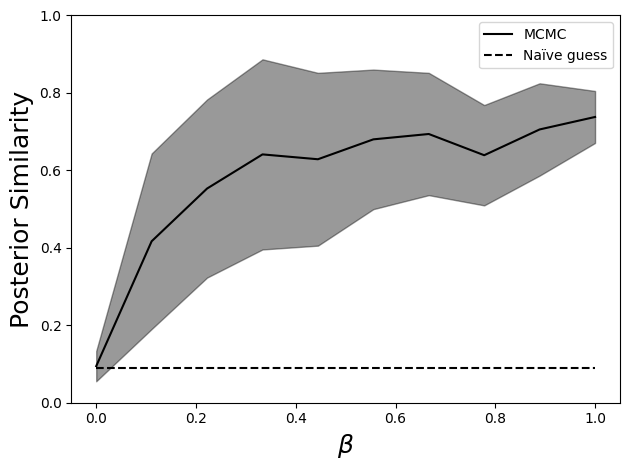

In [19]:
pbm = np.array([np.mean(p) for p in ps_beta])
pbd = np.array([np.std(p) for p in ps_beta])
beta = np.linspace(0, 1, 10)
plt.plot(beta, pbm, color="black", label="MCMC")
plt.fill_between(beta, pbm-pbd, pbm+pbd, color="black", alpha=0.4)

null_ps = posterior_similarity(I, rho*np.ones_like(I))
plt.plot([min(beta), max(beta)], [null_ps, null_ps], "k--", label=r'Naïve guess')
plt.xlabel(r"$\beta$", fontsize=18)
plt.ylabel("Posterior Similarity", fontsize=18)
plt.ylim([0, 1])
plt.legend()
plt.tight_layout()

plt.savefig("Figures/ps_vs_beta.pdf", dpi=1000)
plt.savefig("Figures/ps_vs_beta.png", dpi=1000)
plt.show()

<AxesSubplot: >

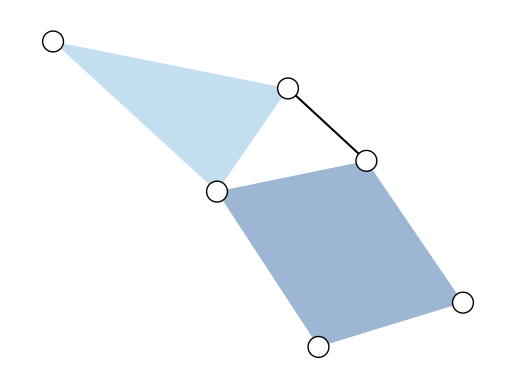

In [14]:
xgi.draw(H, pos=xgi.barycenter_spring_layout(H))

In [15]:

x, y = bipartite_sis_to_matrices(
    I,
    g_x,
    g_y,
    b_x,
    b_y,
    f,
    g,
    s_x,
    s_y,
    tmin=0,
    tmax=200,
    dt=1,
    random_seed=None,
)

NameError: name 's_x' is not defined

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.ylabel("People", fontsize=24)
plt.spy(x.T, aspect="auto")
plt.subplot(212)
plt.ylabel("Rooms", fontsize=24)
plt.xlabel("t", fontsize=24)
plt.spy(y.T, aspect="auto")
# plt.savefig("Figures/infection_trace.png", dpi=1000)
# plt.savefig("Figures/infection_trace.pdf", dpi=1000)
plt.show();

In [ ]:
sample_one_beta(0, x, y, H.nodes.memberships(), f, fmax, max_iter=100)

In [ ]:
np.mean(samples_tmax[5], axis=0)

In [ ]:
meanI = np.mean(samples_beta[9], axis=0)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plt.title("True contact structure", fontsize=20)
plt.imshow(I.T, aspect="equal", vmin=-1, vmax=1)

plt.subplot(312)
plt.title("Inferred contact structure", fontsize=20)
plt.imshow(meanI.T, aspect="equal", vmin=-1, vmax=1)

plt.subplot(313)
plt.title("Difference", fontsize=16)
im = plt.imshow(I.T - meanI.T, aspect="equal", vmin=-1, vmax=1)
plt.colorbar(im)

plt.ylabel("Individuals", fontsize=20)
plt.xlabel("Rooms", fontsize=16)

plt.tight_layout()

# plt.savefig("Figures/incidence.png", dpi=1000)
# plt.savefig("Figures/incidence.pdf", dpi=1000)
plt.show()